In [56]:
import sys
import json

import matplotlib

sys.path.insert(1, '_common')
import matplotlib.pyplot as plt
import numpy as np
import metrics
import metrics_2
import metrics_3
import importlib

In [5]:
def add_result(result_dict: dict, name: str, qubits: [int], depths:[int], rates: [float]):
    metrics = {}
    metrics['avg_create_times'] = [0] * len(qubits)
    metrics['avg_elapsed_times'] = [0] * len(qubits)
    metrics["avg_exec_creating_times"] = []
    metrics["avg_exec_running_times"] = []
    metrics["avg_exec_times"] = [0] * len(qubits)
    metrics["avg_exec_validating_times"] =  []
    metrics["avg_hf_fidelities"] = [0] * len(qubits)
    metrics["avg_depths"] = [100] * len(qubits)
    metrics["avg_tr_n2qs"] = [0] * len(qubits)
    metrics["avg_tr_xis"] = [0] * len(qubits)
    metrics["avg_xis"] = [0] * len(qubits)

    metrics["groups"] = [str(qubit) for qubit in qubits]
    metrics['avg_tr_depths'] = depths
    metrics['avg_fidelities'] = rates

    result = {}
    result['group_metrics'] = metrics

    # Add stubs
    result['backend_id'] = 'simulator'
    result['circuit_metrics'] = None
    result['start_time'] = 0
    result['end_time'] = 0

    result_dict[f'Benchmark Results - {name} - Qiskit'] = result

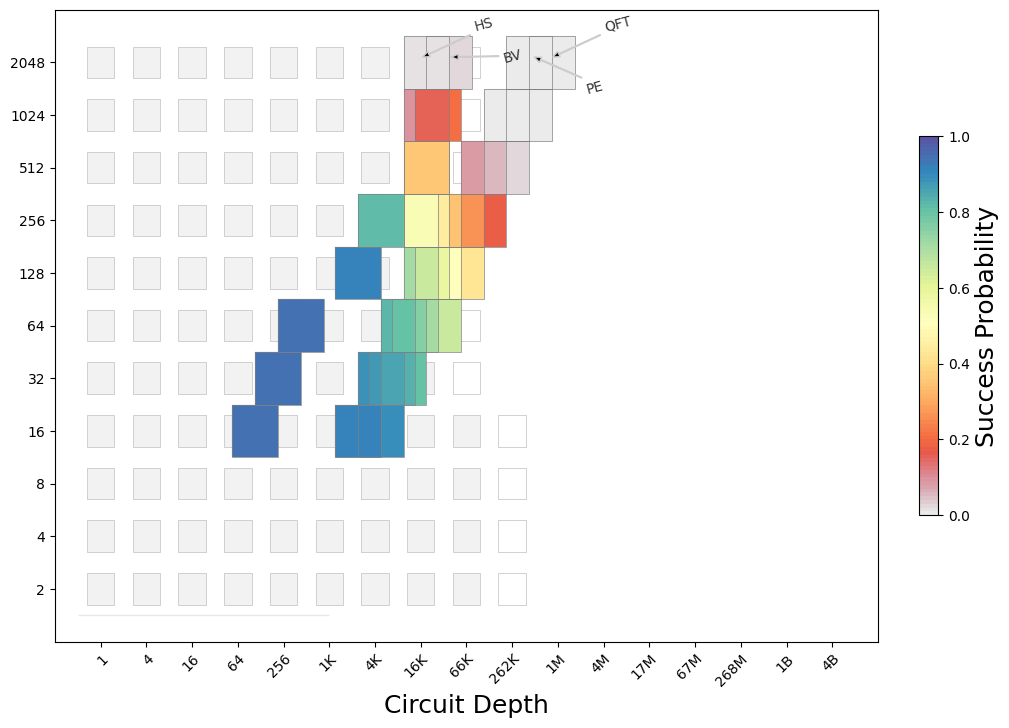

In [111]:
# No QEC
importlib.reload(metrics_2)

d = {}

add_result(d, 'BV', [16, 32, 64, 128, 256, 512, 1024, 2048],
           [102.0, 190.0, 366.0, 2079.0, 5629.0, 21778.0, 27558.0, 41361.0],
           [0.9987794682066863, 0.9975871428984328, 0.9952071046734315, 0.9607275632812143, 0.8578177174844583, 0.42910565719848925, 0.21884053137074275, 0.02878148657878936]
)

add_result(d, 'HS', [2**(i+4) for i in range(8)],
           [2511.0, 5167.0, 10479.0, 17343.0, 17343.0, 17343.0, 17343.0, 17343.0],
           [0.9673667232512145, 0.9338057579135803, 0.8701364361766171, 0.7543669018949325, 0.5678576959147761, 0.3217757395990592, 0.1033191583506776, 0.010652118391643983])
add_result(d, 'QFT', [2**(i+4) for i in range(8)],
           [4154.0, 11106.0, 25010.0, 53798.0, 110394.0, 225282.0, 447868.0, 893917.0],
           [0.9407945444281872, 0.8491153732714923, 0.6916943051363291, 0.4491276348868976, 0.1862828450214337, 0.025295346313953682, 0.0005546954117260708, 1.8170583558844732e-07]
           )
add_result(d, 'PE', [2**(i+4) for i in range(8)],
           [2129.0, 5905.0, 13457.0, 29771.0, 62189.0, 129053.0, 257443.0, 510686.0],
           [0.9693333371038925, 0.9168577051036314, 0.8202820001445174, 0.6344893948451705, 0.36187813997346013, 0.0910744805904641, 0.004031538535016692, 1.6696721274275156e-06]
           )
with open(f'__data/DATA-NO_QEC.json', 'w') as f:
    json.dump(d, f)

metrics_2.plot_all_app_metrics('NO_QEC')

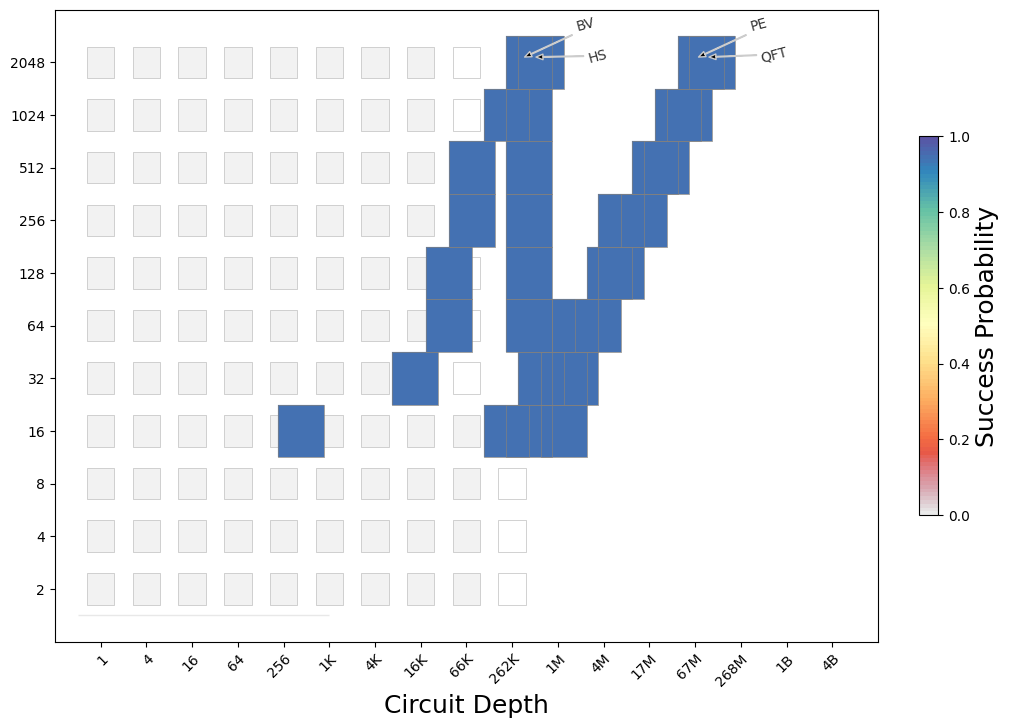

In [110]:
importlib.reload(metrics_2)

d = {}

add_result(d, 'BV', [2**(i+4) for i in range(8)],
           [472.0, 15104.0, 37760.0, 37288.0, 69856.0, 83544.0, 218536.0, 381848.0],
           [0.9999999999515318, 0.9999999995895785, 0.9999999988347837, 0.9999999978377611, 0.999999993123077, 0.9999999843668824, 0.9999999674598455, 0.9999999062868529]
)
add_result(d, 'HS', [2**(i+4) for i in range(8)],
           [1153754.6666666667, 1593293.3333333333, 388626.6666666667, 411080.0, 473204.0, 490890.6666666667, 520892.0, 539537.3333333334],
           [0.9999990215724458, 0.9999955410973559, 0.9999881889034591, 0.9999739706920393, 0.9999512471927635, 0.9999052233397326, 0.9998002627763203, 0.999624948810074]
           )
add_result(d, 'QFT', [2**(i+4) for i in range(8)],
           [461568.0, 1075124.0, 3153966.6666666665, 7874212.0, 12338628.0, 25962396.0, 48845798.666666664, 102010754.66666667],
           [0.9999998627936977, 0.9999996463911994, 0.9999991926532638, 0.9999982968261163, 0.99999479826465, 0.9999891321089133, 0.999977113645511, 0.9999521547974805]
           )
add_result(d, 'PE', [2**(i+4) for i in range(8)],
           [237436.0, 545917.3333333334, 1859182.6666666667, 5250972.0, 8114301.333333333, 17395294.666666668, 36130402.666666664, 74356252.0],
           [0.9999999386509492, 0.9999998210602467, 0.9999995461862895, 0.9999989479066449, 0.9999971231488001, 0.9999943839010798, 0.9999845162315628, 0.9999649578941181]
           )
with open(f'__data/DATA-QEC.json', 'w') as f:
    json.dump(d, f)

metrics_2.plot_all_app_metrics('QEC')

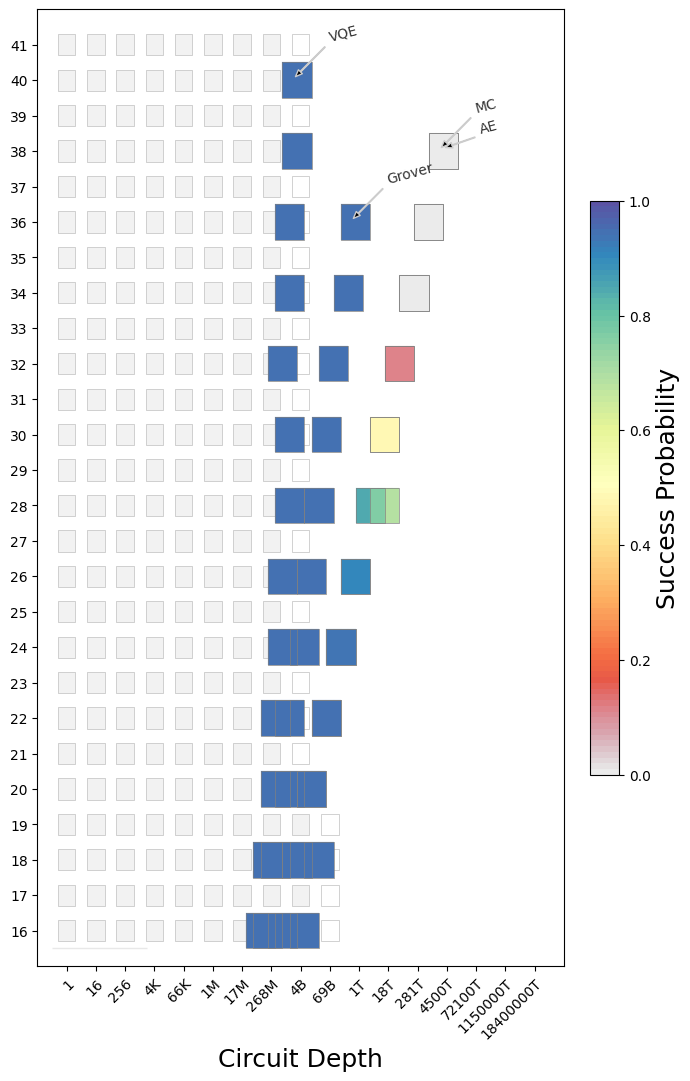

In [123]:
importlib.reload(metrics_3)
d = {}


add_result(d, 'AE', [y - 15 for y in [16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]],
           [5705653200.0, 25806513333.333332, 15180400000.0, 60802506666.666664, 267106446666.66666, 952740040000.0, 12607179533333.334, 17425465333333.334, 62073020000000.0, 248956746666666.66, 1113327120000000.0, 3918837666666666.5],
           [0.9999255779761588, 0.999669140496431, 0.998644447133147, 0.9946839557689926, 0.9800148311276362, 0.9219471589818989, 0.7206679963114887, 0.27446589500447, 0.004404211286011642, 2.877331883603923e-10, 1.2640988224650202e-37, 1.1429199955735255e-146]
           )

add_result(d, 'Grover', [y - 15 for y in list(range(16, 38, 2))],
           [223131864.0, 510033288.0, 1250618280.0, 2049829920.0, 4625722720.0, 10418290800.0, 25309867200.0, 55958526400.0, 132754956000.0, 289747348000.0, 630235923200.0],
           [0.9999980225421274, 0.9999942420245277, 0.9999867768739789, 0.9999668593639516, 0.9999236417276745, 0.9998337968566388, 0.9996344514321441, 0.9991732497607565, 0.9982348419005612, 0.9961450193425555, 0.9913323409108249]
)

add_result(d, 'MC', [y - 15  for y in list(range(16, 40, 2))],
           [654613466.6666666, 2604360000.0, 10182046666.666666, 42134506666.666664, 168441306666.66666, 625299506666.6666, 2673354266666.6665, 10799051600000.0, 39899694666666.664, 172280266666666.66, 671690280000000.0, 2649403866666666.5],
           [0.9999675667419169, 0.9999048007873933, 0.9994822140192907, 0.9979766355798744, 0.9951695501920991, 0.9772345365581047, 0.8851597421231142, 0.748986113202219, 0.23421972359903995, 0.00023344136431904054, 6.1101611957622295e-09, 2.539036007486898e-57]
)


add_result(d, 'VQE', [y - 15 for y in [16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]],
           [104438513.33333333, 166678636.0, 288707030.6666667, 447039785.3333333, 706031996.0, 1027990094.6666666, 1517600017.3333333, 2101145198.6666667, 923688112.0, 1501268685.3333333, 1654831133.3333333, 2515590109.3333335, 2617335389.3333335],
           [0.9999981392743935, 0.999996979595492, 0.9999951173832818, 0.9999928683753171, 0.999988958340876, 0.9999848338713759, 0.9999784229282079, 0.9999704079986054, 0.9999573003766601, 0.9999376445669955, 0.9999283937357033, 0.9998991988536087, 0.9998904979084542]
)


with open(f'__data/DATA-QEC.json', 'w') as f:
    json.dump(d, f)

metrics_3.plot_all_app_metrics('QEC')


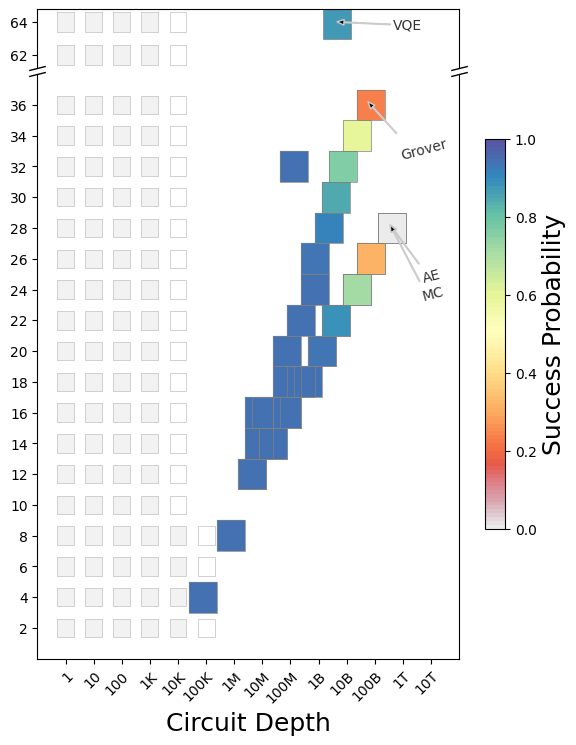

In [27]:

#
importlib.reload(metrics)
d = {}

add_result(d, 'AE', list(range(12, 30, 2)),
           [4751733.0, 18975871.0, 85709406.0, 304650852.0, 1200093670.0, 5484770900.0, 24411378000.0, 80915544000.0, 351078640000.0],
           [0.9999630272357538, 0.9998240134027113, 0.9991750042191725, 0.9970980687227871, 0.9867074686627908, 0.9392128004869819, 0.7609180860103967, 0.36302795096167634, 0.009591014178381428]
           )
add_result(d, 'Grover', list(range(12, 38, 2)),
           [3642229.0, 6950549.0, 15524845.0, 56371565.0, 90906954.0, 185982928.0, 579434665.0, 921976790.0, 1911749370.0, 5613974050.0, 9289756600.0, 19331837000.0, 57542149000.0],
           [0.9999641202875174, 0.9999176615944457, 0.9997974490987126, 0.9992433791907718, 0.9986103899617353, 0.9969186226624814, 0.9900614179443411, 0.9825849388207167, 0.9621433408504032, 0.8889722957390813, 0.8099858025411727, 0.6312918035434877, 0.24366417139925076]
)
add_result(d, 'MC', list(range(12, 30, 2)),
           [5410014.0, 22577994.0, 86312564.0, 339972916.0, 1380508420.0, 5582841800.0, 22122597000.0, 89618366000.0, 353492640000.0],
           [0.9999467440315043, 0.9997698792489127, 0.9990798665772264, 0.9961657595766343, 0.9836119560237699, 0.9340647294397635, 0.7502032988210009, 0.3074552444365164, 0.00790145512023032]
)
add_result(d, 'VQE', [4, 8, 16, 32, 64],
           [57923.0, 645262.0, 8558040.0, 166018919.0, 4561371945.0],
           [0.9999998710581591, 0.9999978513576784, 0.9999464342560189, 0.9981064886176881, 0.9263089765072453]
)
with open(f'__data/DATA-QEC.json', 'w') as f:
    json.dump(d, f)

metrics.max_depth_log=15
metrics.plot_all_app_metrics('QEC')

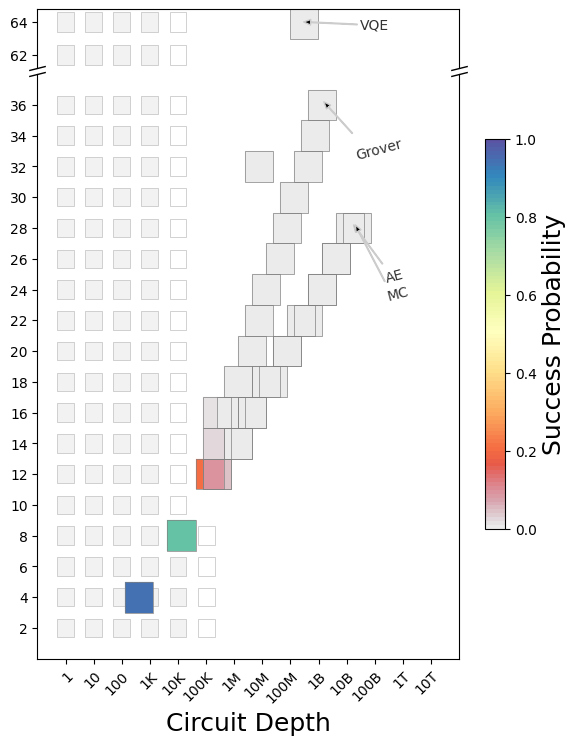

In [7]:
importlib.reload(metrics)
d = {}

add_result(d, 'AE', list(range(12, 30, 2)), [270090, 1078444,4310678,17238216,68952630,275918500,1106425000, 4416343000, 17668975000],           [0.05046432734247366,0.0016931793254168811,0.00009658323713067143,	0.000006022437841336235,	0.000000000000000000000000000000000000000000005574139923393225,	0, 0, 0, 0])
add_result(d, 'Grover', list(range(12, 38, 2)),
           [107457.0, 259865.0, 612708.0, 1406277.0, 3174281.0, 7072081.0, 15591273.0, 34066705.0, 73920490.0, 159295050.0, 341720900.0, 727602000.0, 1547460000.0],
           [0.21858666663083842, 0.027299353852812867, 0.00029736485041387825, 4.216452193095158e-08, 1.9328921044224997e-14, 7.814844742420464e-22, 3.9570207481233215e-27, 1.637286815084449e-117, 7.5984181554464e-254, 0.0, 0.0, 0.0, 0.0]
)
add_result(d, 'MC', list(range(12, 30, 2)),
           [310828.0, 1242026.0, 4965744.0, 19859326.0, 79432480.0, 317802900.0, 1273806000.0, 5086968000.0, 20350395000.0],
           [0.03450574110079936, 0.0011273363479157512, 6.829641605566267e-05, 4.258905100318738e-06, 1.765382073015223e-46, 0.0, 0.0, 0.0, 0.0]
)
add_result(d, 'VQE', [4, 8, 16, 32, 64], [521.0, 11261.0, 316179.0, 9715462.0, 296786842.0],
           [0.9928160029770089, 0.8500669296250878, 0.014872559925600985, 1.1640854399302952e-17, 3.5559827896966924e-39]
)
with open(f'__data/DATA-NO_QEC.json', 'w') as f:
    json.dump(d, f)

metrics.max_depth_log = 15
metrics.plot_all_app_metrics('NO_QEC')
